<h1 align=center><font size=5>Text Generation Models</font></h1>

### Table of contents

- [Objective](#obj)
- [Data](#data)
- [Word-based Model for Text Generation](#word_based_model)
- [Character-based Model for Text Generation](#char_based_model)

### Objective <a id="obj"></a>

In this notebook, we learn how to generate texts using word-based or character-based models in Keras.

### Data <a id="data"></a>



#### Load Shakespeare dataset

&#x270d; Load the dataset of Shakespeare's writing from the following link:
https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt

In [ ]:
from keras.utils.data_utils import get_file

path = get_file('shakespeare.txt',
                origin = 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

with open(path, encoding='utf-8') as f:
    text = f.read().lower()
print('Length of text: {} characters'.format(len(text)))

Using TensorFlow backend.


1122304/1115394 [==============================] - 0s 0us/step
Length of text: 1115394 characters


&#x270d; Take a look at the first 250 characters in text.

In [ ]:
print(text[:250])

first citizen:
before we proceed any further, hear me speak.

all:
speak, speak.

first citizen:
you are all resolved rather to die than to famish?

all:
resolved. resolved.

first citizen:
first, you know caius marcius is chief enemy to the people.



Since this dataset is very large, in continue, we only consider portion of that for processing.

In [ ]:
data = text[:5000]

In [ ]:
data

"first citizen:\nbefore we proceed any further, hear me speak.\n\nall:\nspeak, speak.\n\nfirst citizen:\nyou are all resolved rather to die than to famish?\n\nall:\nresolved. resolved.\n\nfirst citizen:\nfirst, you know caius marcius is chief enemy to the people.\n\nall:\nwe know't, we know't.\n\nfirst citizen:\nlet us kill him, and we'll have corn at our own price.\nis't a verdict?\n\nall:\nno more talking on't; let it be done: away, away!\n\nsecond citizen:\none word, good citizens.\n\nfirst citizen:\nwe are accounted poor citizens, the patricians good.\nwhat authority surfeits on would relieve us: if they\nwould yield us but the superfluity, while it were\nwholesome, we might guess they relieved us humanely;\nbut they think we are too dear: the leanness that\nafflicts us, the object of our misery, is as an\ninventory to particularise their abundance; our\nsufferance is a gain to them let us revenge this with\nour pikes, ere we become rakes: for the gods know i\nspeak this in hunger 

### Word-based Model for Text Generation <a id="word_based_model"></a>

#### Preprocessing <a id="preprocessing"></a>

&#x270d; Create a Python list of sentences from the data.

In [ ]:
corpus = data.split('\n')

print(corpus)

['first citizen:', 'before we proceed any further, hear me speak.', '', 'all:', 'speak, speak.', '', 'first citizen:', 'you are all resolved rather to die than to famish?', '', 'all:', 'resolved. resolved.', '', 'first citizen:', 'first, you know caius marcius is chief enemy to the people.', '', 'all:', "we know't, we know't.", '', 'first citizen:', "let us kill him, and we'll have corn at our own price.", "is't a verdict?", '', 'all:', "no more talking on't; let it be done: away, away!", '', 'second citizen:', 'one word, good citizens.', '', 'first citizen:', 'we are accounted poor citizens, the patricians good.', 'what authority surfeits on would relieve us: if they', 'would yield us but the superfluity, while it were', 'wholesome, we might guess they relieved us humanely;', 'but they think we are too dear: the leanness that', 'afflicts us, the object of our misery, is as an', 'inventory to particularise their abundance; our', 'sufferance is a gain to them let us revenge this with', 

In [ ]:
len(corpus)

172

&#x270d; Using the Tokenizer class in keras, create the dictionary of words and the overall corpus.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

&#x270d; How many words are in this corpus?

In [ ]:
print(tokenizer.word_index)

total_words = len(tokenizer.word_index)

print('Total number of words:', total_words)

{'the': 1, 'you': 2, 'citizen': 3, 'to': 4, 'first': 5, 'and': 6, 'it': 7, 'for': 8, 'we': 9, 'us': 10, 'all': 11, 'a': 12, 'they': 13, 'i': 14, 'in': 15, 'not': 16, 'what': 17, 'with': 18, 'he': 19, 'of': 20, 'as': 21, 'speak': 22, 'are': 23, 'is': 24, 'our': 25, 'be': 26, 'but': 27, 'that': 28, 'menenius': 29, 'have': 30, 'second': 31, 'his': 32, 'your': 33, 'more': 34, 'against': 35, 'well': 36, 'did': 37, 'must': 38, 'him': 39, 'good': 40, 'would': 41, 'them': 42, 'this': 43, 'say': 44, 'will': 45, 'sir': 46, 'belly': 47, 'hear': 48, 'resolved': 49, 'know': 50, 'let': 51, 'done': 52, 'one': 53, 'poor': 54, 'patricians': 55, 'if': 56, 'hath': 57, 'which': 58, 'even': 59, "o'": 60, 'my': 61, 'where': 62, 'strong': 63, 'shall': 64, 'tell': 65, 'care': 66, 'may': 67, 'make': 68, 'like': 69, 'proceed': 70, 'any': 71, 'than': 72, 'famish': 73, 'caius': 74, 'marcius': 75, 'people': 76, "know't": 77, "we'll": 78, 'at': 79, 'no': 80, 'away': 81, 'citizens': 82, 'on': 83, 'were': 84, 'wholes

&#x270d; Add one to the total number of wrods, to consider outer vocabulary words.

In [ ]:
total_words = total_words + 1

print(total_words)

386


&#x270d; Break down the sentences into phrases, the first two words, the first three words, etc.

In [ ]:
sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        sequences.append(token_list[:i+1])
print(sequences)
print(len(sequences))    

[[5, 3], [132, 9], [132, 9, 70], [132, 9, 70, 71], [132, 9, 70, 71, 133], [132, 9, 70, 71, 133, 48], [132, 9, 70, 71, 133, 48, 134], [132, 9, 70, 71, 133, 48, 134, 22], [22, 22], [5, 3], [2, 23], [2, 23, 11], [2, 23, 11, 49], [2, 23, 11, 49, 135], [2, 23, 11, 49, 135, 4], [2, 23, 11, 49, 135, 4, 136], [2, 23, 11, 49, 135, 4, 136, 72], [2, 23, 11, 49, 135, 4, 136, 72, 4], [2, 23, 11, 49, 135, 4, 136, 72, 4, 73], [49, 49], [5, 3], [5, 2], [5, 2, 50], [5, 2, 50, 74], [5, 2, 50, 74, 75], [5, 2, 50, 74, 75, 24], [5, 2, 50, 74, 75, 24, 137], [5, 2, 50, 74, 75, 24, 137, 138], [5, 2, 50, 74, 75, 24, 137, 138, 4], [5, 2, 50, 74, 75, 24, 137, 138, 4, 1], [5, 2, 50, 74, 75, 24, 137, 138, 4, 1, 76], [9, 77], [9, 77, 9], [9, 77, 9, 77], [5, 3], [51, 10], [51, 10, 139], [51, 10, 139, 39], [51, 10, 139, 39, 6], [51, 10, 139, 39, 6, 78], [51, 10, 139, 39, 6, 78, 30], [51, 10, 139, 39, 6, 78, 30, 140], [51, 10, 139, 39, 6, 78, 30, 140, 79], [51, 10, 139, 39, 6, 78, 30, 140, 79, 25], [51, 10, 139, 39, 6

&#x270d; Find the length of the longest sentence in the corpus.

In [ ]:
max_sequence_length = max([len(x) for x in sequences])
print(max_sequence_length)

12


&#x270d; Pre-pad sequences with zero to make it easier to extract the labels.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

sequences_padded = pad_sequences(sequences, maxlen= max_sequence_length, padding='pre')
sequences_padded = np.array(sequences_padded)
print(sequences_padded)
print(sequences_padded.shape)

[[  0   0   0 ...   0   5   3]
 [  0   0   0 ...   0 132   9]
 [  0   0   0 ... 132   9  70]
 ...
 [  0   0   0 ... 382   1 383]
 [  0   0   0 ...   1 383 384]
 [  0   0   0 ...   0   1 385]]
(748, 12)


&#x270d; For each given sentence, take all but the last token as the input values $X$, and then use the last token as its label $y$.

In [ ]:
X = sequences_padded[:,:-1]
y = sequences_padded[:,-1]

print(y)

print(y.shape)

[  3   9  70  71 133  48 134  22  22   3  23  11  49 135   4 136  72   4
  73  49   3   2  50  74  75  24 137 138   4   1  76  77   9  77   3  10
 139  39   6  78  30 140  79  25 141 142  12 144  34 145 146  51   7  26
  52  81  81   3 147  40  82   3  23 148  54  82   1  55  40 149 150  83
  41 151  10  56  13 152  10  27   1 153 154   7  84   9 155 156  13 157
  10 158  13  86   9  23  87 159   1 160  28  10   1 162  20  25 163  24
  21  88   4 165  89 166  25  24  12 168   4  42  51  10  90  43  18 169
 170   9 171 172   8   1  91  50  14  43  15 173   8 174  16  15 175   8
  90   3   2  70 176  35  74  75  39   5  92  12  93 177   4   1 178   3
   2  17 180  19 181  52   8  32  94   3  36   6 182  26  95   4 183  39
  40 185  27  28  19 186 187  18 188  96   3  27  22  16 190   3  44  97
   2  17  19  57  52 191  19  37   4  28 192 193  98 194 195  99  26   4
  44   7 100   8  32  94  19  37   7   4  32 196   6   4  26 197  96  58
  19  59 198   1 199  20  32 200   3  19 102 103  1

&#x270d; Using _to_categorical_ class in keras, one-hot encode the labels.

In [ ]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y, num_classes= total_words)

print(y.shape)
print(X.shape)

(748, 386)
(748, 11)


#### Build the Model <a id="preprocessing"></a>

##### LSTM <a id="lstm"></a>

&#x270d; Create a model with LSTM nodes.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential()

model.add(Embedding(total_words, 64, input_length= max_sequence_length-1))
# the size of the input dimensions will be fed in is the length of the longest sequence minus 1
# we subtract one because we cropped off the last word of each sequence to get the label

model.add(LSTM(150))
# LSTMs carry context along with their cell state, so it's not just next door neighbor words that have an impact.

model.add(Dense(total_words, activation='softmax'))
# Finally there's a dense layer sized as the total words, 
# which is the same size that we used for the one-hot encoding.
# this layer will have one neuron per word and that neuron should light up when we predict a given word.

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 11, 64)            24704     
_________________________________________________________________
lstm (LSTM)                  (None, 150)               129000    
_________________________________________________________________
dense (Dense)                (None, 386)               58286     
Total params: 211,990
Trainable params: 211,990
Non-trainable params: 0
_________________________________________________________________


&#x270d; Compile and fit your model.

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])
history = model.fit(X, y, epochs= 100, verbose=0)

&#x270d; Plot loss and accuracy over training epochs.

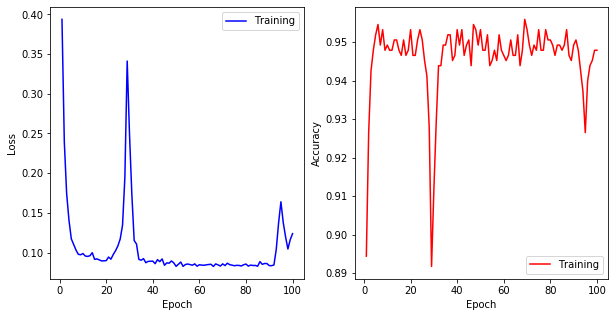

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_model(history):
    loss_train = history.history['loss']
    acc_train = history.history['acc']

    epochs = range(1, len(loss_train)+1)

    plt.figure(figsize=(10, 5))
    plt.subplot(1,2,1)
    plt.plot(epochs, loss_train, 'b')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training'], loc='best')

    plt.subplot(1,2,2)
    plt.plot(epochs, acc_train,'r')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training'], loc='best')
    plt.show()
    
plot_model(history)

&#x270d; Now, let us take a look at predicting words using the model that we trained. We are going to ask it to generate the next 50 words for the given seed text.

In [ ]:
seed_text = "I'm suffering in this dearth"
next_words = 50

for _ in range(next_words):
    # Create a token lists using tokenizer text sequences of the seed text
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    
    # Pre-pad the token list with the length of max_sequence_length-1
    token_list_padded = pad_sequences([token_list], maxlen= max_sequence_length-1, padding= 'pre')
    
    # Predict the classe for the given token list 
    predicted = model.predict_classes(token_list_padded, verbose=0)

    # Turn the token back into a word and add that to the seed text
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
    
print(seed_text)

I'm suffering in this dearth you may as well but he account a please please please please please please please please please which own it fitly it fitly proud an own price price price fathers kill you yourselves price price own price price please please please please please please which which own fitly fitly proud


##### Bidirectional LSTM <a id="bi_lstm"></a>

&#x270d; Create a model with Bidirectional LSTM nodes.

In [ ]:
from tensorflow.keras.layers import Bidirectional

model = Sequential()
model.add(Embedding(total_words, 100, input_length= max_sequence_length-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 11, 100)           38600     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 300)               301200    
_________________________________________________________________
dense_2 (Dense)              (None, 386)               116186    
Total params: 455,986
Trainable params: 455,986
Non-trainable params: 0
_________________________________________________________________


&#x270d; Compile and fit your model.

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])
history = model.fit(X, y, epochs= 10, verbose= 1)

Train on 748 samples
Epoch 1/10
748/748 [==============================] - 3s 4ms/sample - loss: 5.9014 - acc: 0.0428
Epoch 2/10
748/748 [==============================] - 2s 3ms/sample - loss: 5.5240 - acc: 0.0468
Epoch 3/10
748/748 [==============================] - 2s 2ms/sample - loss: 5.4300 - acc: 0.0521
Epoch 4/10
748/748 [==============================] - 2s 2ms/sample - loss: 5.3569 - acc: 0.0508
Epoch 5/10
748/748 [==============================] - 2s 2ms/sample - loss: 5.2756 - acc: 0.0575
Epoch 6/10
748/748 [==============================] - 2s 3ms/sample - loss: 5.1548 - acc: 0.0682
Epoch 7/10
748/748 [==============================] - 2s 3ms/sample - loss: 5.0078 - acc: 0.0789
Epoch 8/10
748/748 [==============================] - 2s 3ms/sample - loss: 4.8796 - acc: 0.0816
Epoch 9/10
748/748 [==============================] - 2s 2ms/sample - loss: 4.7376 - acc: 0.0842
Epoch 10/10
748/748 [==============================] - 2s 2ms/sample - loss: 4.5903 - acc: 0.0936


&#x270d; Plot loss and accuracy over training epochs.

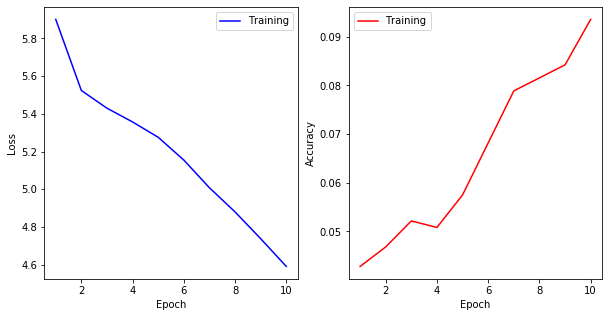

In [ ]:
plot_model(history)

In [ ]:
seed_text = "I'm suffering in this dearth"
next_words = 50

for _ in range(next_words):
    # Create a token lists using tokenizer text sequences of the seed text
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    
    # Pre-pad the token list with the length of max_sequence_length-1
    token_list_padded = pad_sequences([token_list], maxlen= max_sequence_length-1, padding= 'pre')
    
    # Predict the classe for the given token list 
    predicted = model.predict_classes(token_list_padded, verbose=0)

    # Turn the token back into a word and add that to the seed text
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
    
print(seed_text)

I'm suffering in this dearth you the belly belly so so proud can us will will price fathers us price for us did will price will will will loved will proud fathers you away can you to can you and can you did will unactive will unactive away will loved will can you and loved


### Character-based Model for Text Generation <a id="char_based_model"></a>

Check out this link: https://www.tensorflow.org/tutorials/text/text_generation